In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

## 1) Missing Data

#### We can use seaborn to create a seaborn heatmap to see where we are missing out 

In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### Here in the above command the visualisation is not good, suppose we have millions of data and checking the nulll values with this is not good.. so we going to provide visualisation using seaborn to find out the missing values..

<AxesSubplot:>

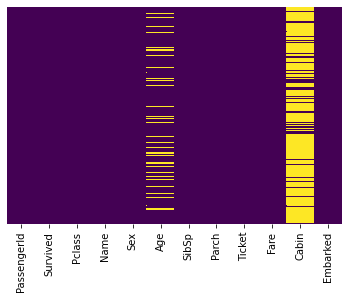

In [8]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

### Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 

#### Now we are going to examine how many people are survived and how many are not..by using countplot


<AxesSubplot:xlabel='Survived', ylabel='count'>

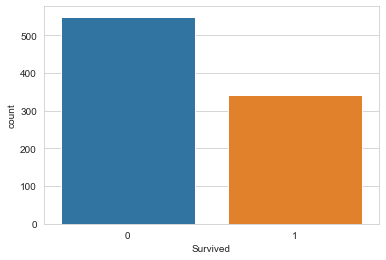

In [10]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train)

#### From here we can say how many are survived and not..more are not survived..now based on this survival rate we are going to differentiate between male anf female(how many males survived, how many males not survived, how many females survived and not survived)

<AxesSubplot:xlabel='Survived', ylabel='count'>

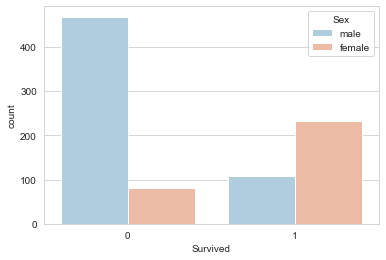

In [12]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

#### From here also we gathered some information like, men survived is muchh less.

### Now based on the passenger-class(Pclass) we are going to find out the survival rates

<AxesSubplot:xlabel='Survived', ylabel='count'>

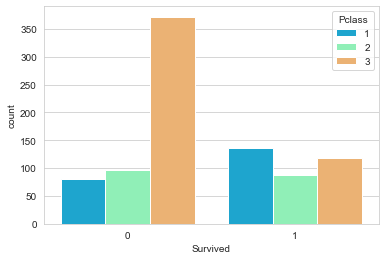

In [15]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'rainbow')

### The info that we can be inferred from here are:                                                                  1)for not survived(0): people in passanger class 1 are less died(blue),                              whereas the people in class 3 are more died.                                                                             2)for survived(1): people in passenger class 1 are more survived than class 2 and class 3
    

#### Now we are going to see the distribution of age, whether it follows normal distribution or not, that help us to find out the average overview of people's age in the titanic boat..

<AxesSubplot:xlabel='Age'>

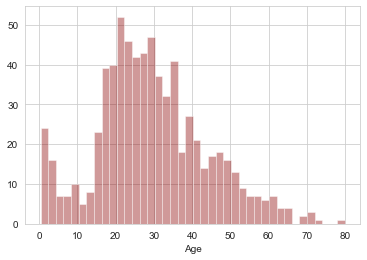

In [17]:
sns.distplot(train['Age'].dropna(), kde = False, color = 'darkred', bins = 40)

### Here we can see that most people in the boat are of age group between 18 to 30..very less number of people who are elders

#### Now we are going to find out some more informations...next the count of siblings and spouse(SibSp)...for this we use countplot again

<AxesSubplot:xlabel='SibSp', ylabel='count'>

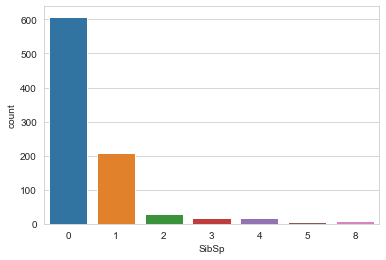

In [18]:
sns.countplot(x = 'SibSp', data = train)

#### 0- had no sibling or spouse                                                                                                                                        1- who had 1  spouse                                                                                                                                     2- "         "  2   "                   "                                                                                                                                         3- "         "  3   "            "..                  ..and so on                                                                                                so here the max numbe of people have no sibling or spouse

<AxesSubplot:xlabel='Fare'>

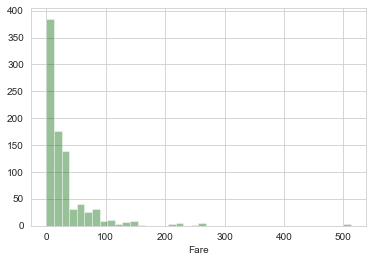

In [21]:
sns.distplot(train["Fare"].dropna(), kde = False, color = 'darkgreen', bins = 40)

## Now we gathered all the informations, now we are going to remove null values

# Data Cleaning

#### here more null values are for Age and Cabin,,,so here we are going to remove the null values
#### of Age...so before that some analysis were made and we found out there is are some relations 
#### between Age and Pclass

#### For that, we use box plot

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

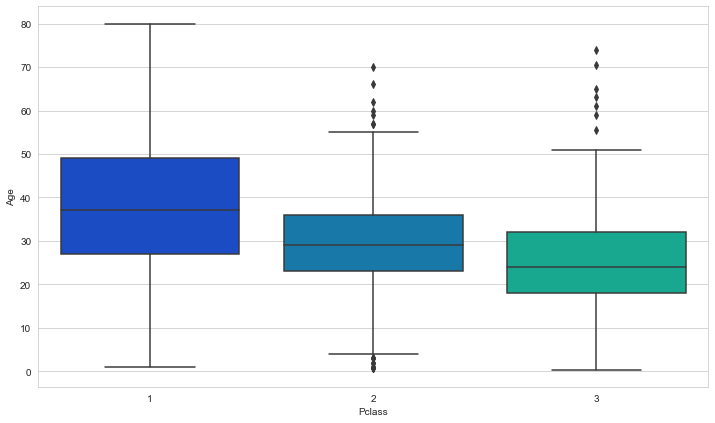

In [23]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

#### From this boxplot we can derive many informations...In the x-axis, they are the Pclass 1,2,3...The y-axis, give the ages in the corresponding Pclass...........In the Pclass 1, the average is approximately about 37.....In the Pclass2, the average is about 29, for class3 it is about 24............. now we are going to replace this with the missing values of our Age.........

#### 
We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [34]:
def imput_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

#### Now apply the function using .apply()

In [35]:
train['Age'] = train[['Age', 'Pclass']].apply(imput_age, axis = 1)

#### Now lets check the heatmap again!!!

<AxesSubplot:>

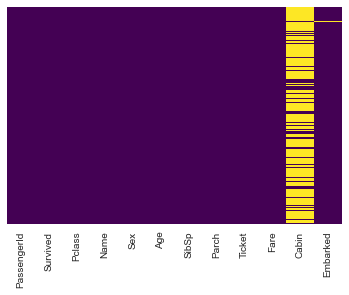

In [37]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#### here on looking Cabin, there are a lot of null values,, so we have to apply some feauture engineerinng...sso now we are going to drop this column..

In [38]:
train.drop('Cabin',axis=1,inplace=True)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

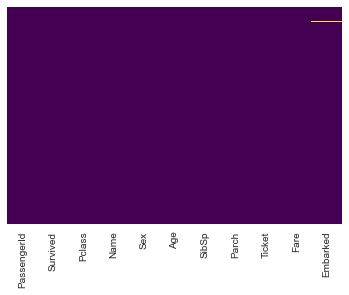

In [40]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')